In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [4]:
df=pd.read_csv('C:/Users/Usuario/Documents/PRACTICANDO CON PYTHON/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [5]:
df.shape

(10841, 13)

In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# As you can see only rating columns has more than 1000 null values other columns has 8 or 4 or 1 null values so we can drop them but  rating is important column and has so many null values so it will be a good option to fill those null values 


<AxesSubplot:>

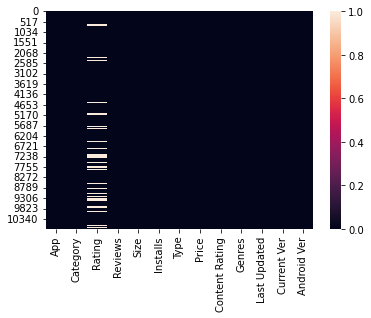

In [10]:
sns.heatmap(df.isnull(),cbar=True)

# Data Cleaning 

# we will take mean of rating column and fill the mean values with null values and then round the decimal place to 1 

In [12]:
a=df['Rating'].mean()
a

4.193338315362443

In [13]:
df['Rating']=df['Rating'].fillna(a)
df['Rating']=df['Rating'].round(1)
df['Rating'].sample(6)

5833    4.2
3490    4.5
3112    4.7
8123    4.2
5936    4.1
8257    4.1
Name: Rating, dtype: float64

In [16]:
df.dropna(inplace=True)

# we have 482 duplicated rows we have to drop those

In [20]:
df.duplicated().sum()

483

In [21]:
df.drop_duplicates(inplace=True)

# I have to perform data cleaning in columns like Reviews,Size,Installs,Price and Ratings  also changed their dtypes  

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10346 non-null  float64
 3   Reviews         10346 non-null  object 
 4   Size            10346 non-null  object 
 5   Installs        10346 non-null  object 
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  object 
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Review columns has '3.0M' text so removed it  and now i will change the dtype to int 

In [28]:
df=df[df['Reviews'].str.isnumeric()]

In [29]:
df['Reviews']=df['Reviews'].astype('int64')

# I  replace "varies with device" text with 10 because it was occuring most of  time and it occur before 11 so i replaced it with 10 and after that changed the dtype to float 

In [69]:
def get_size(size):
    if size == 'Varies with device':
        return 10
    elif size.endswith('M'):
        size = size[:-1]
        return float(size)
df['Size'] = df['Size'].apply(get_size)

# Install column has '+' and ', ' so removed those using regex and changed dtype to int 

In [75]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [72]:
df['Installs']=df['Installs'].str.replace(r"[^a-zA-Z\d\_]+","")

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10084\2658453749.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Installs']=df['Installs'].str.replace(r"[^a-zA-Z\d\_]+","")


In [73]:
df['Installs']=df['Installs'].astype('int64')

# price columns has dollar  so removed it using regex then  c hnaged the dtype to float

In [74]:
df['Price'].unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$1.49 ', '$2.99 ', '$7.99 ',
       '$5.99 ', '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ',
       '$9.00 ', '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ',
       '$16.99 ', '$14.99 ', '$1.00 ', '$29.99 ', '$12.99 ', '$2.49 ',
       '$10.99 ', '$1.50 ', '$19.99 ', '$15.99 ', '$33.99 ', '$74.99 ',
       '$39.99 ', '$3.95 ', '$4.49 ', '$1.70 ', '$8.99 ', '$2.00 ',
       '$3.88 ', '$25.99 ', '$399.99 ', '$17.99 ', '$400.00 ', '$3.02 ',
       '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ', '$2.50 ', '$1.59 ',
       '$6.49 ', '$1.29 ', '$5.00 ', '$13.99 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$19.90 ', '$8.49 ', '$1.75 ',
       '$14.00 ', '$4.85 ', '$46.99 ', '$109.99 ', '$154.99 ', '$3.08 ',
       '$2.59 ', '$4.80 ', '$1.96 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$4.29 ', '$2.60 ', '$3.28 ', '$4.60 ',
       '$28.99 ', '$2.95 ', '$2.90 ', '$1.97 ', '$200.00 ', '$89.99 ',
       '$2.56 '

In [79]:
df1=df.copy()
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [80]:
df1['Price']=df1['Price'].str.replace(r'[^0-9\.-]','')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10084\2175141642.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Price']=df1['Price'].str.replace(r'[^0-9\.-]','')


In [81]:
df['Price']=df['Price'].replace('[^0-9\.-]','',regex=True)

In [82]:
df['Price']=df['Price'].astype(float)

# Cleaned dataset

In [83]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


# Visualizations 

# Free apps are more than Paid apps

In [84]:
df['Type'].value_counts()

Free    9584
Paid     762
Name: Type, dtype: int64

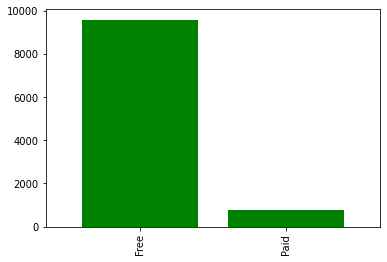

<Figure size 3600x3600 with 0 Axes>

In [96]:
df['Type'].value_counts().plot(kind='bar',color='green',width=0.8)
fig = plt.figure(figsize = (20,20))

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Installs', ylabel='Category'>

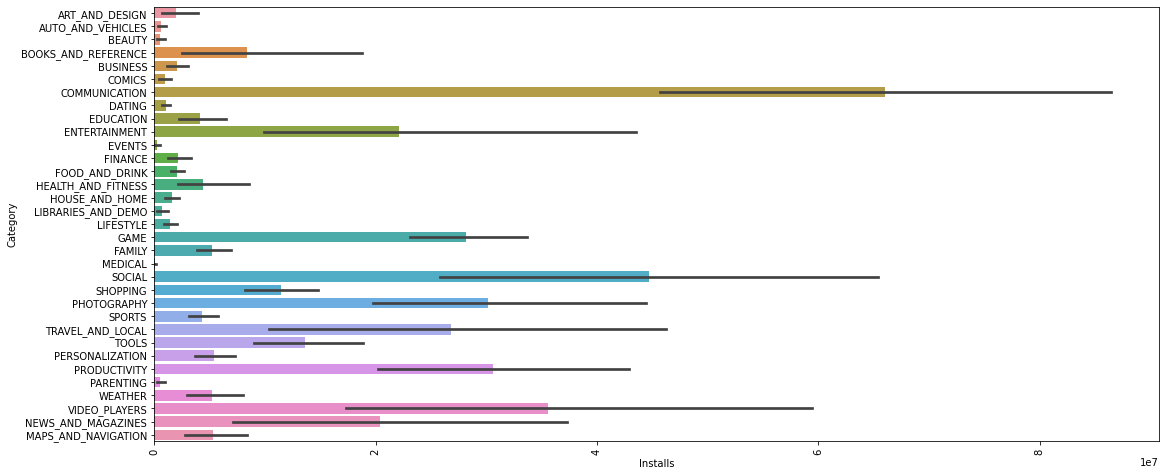

In [171]:
plt.subplots(figsize=(18,8))
plt.xticks(rotation = 90)
# sns.barplot('Category','Installs', data = df)
sns.barplot('Installs','Category', data = df)


# Communication category is most installed category, well  instagram,facebook,whatsapp etc and social category is second most installed category 

In [173]:
## la categoria con el mayor promedio de instalaciones es comunicacion.
gb=df.groupby('Category').mean('Installs').sort_values('Installs',ascending=False)
gb


,Rating,Reviews,Size,Installs,Price
Category,,,,,
COMMUNICATION,4.159290,1.642824e+06,12.105341,6.598983e+07,0.227158
SOCIAL,4.247857,1.905632e+06,15.140794,4.469239e+07,0.057036
VIDEO_PLAYERS,4.075429,6.307439e+05,14.890643,3.555430e+07,0.059771
PRODUCTIVITY,4.201474,2.519767e+05,12.718088,3.062185e+07,0.616536
PHOTOGRAPHY,4.183851,6.344640e+05,15.295298,3.019021e+07,0.379596
GAME,4.277877,1.262745e+06,40.550447,2.813918e+07,0.256289
TRAVEL_AND_LOCAL,4.108439,2.344522e+05,21.140851,2.684341e+07,0.210759
ENTERTAINMENT,4.136036,4.285650e+05,17.628829,2.212306e+07,0.071892
NEWS_AND_MAGAZINES,4.142045,1.448707e+05,12.186260,2.042886e+07,0.015076


In [176]:
communication=df[df['Category']=='COMMUNICATION']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,10.0,1000000000,Free,0.0,Everyone,Communication,1-Aug-18,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,10.0,1000000000,Free,0.0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
337,Messenger for SMS,COMMUNICATION,4.3,125257,17.0,10000000,Free,0.0,Teen,Communication,6-Jun-18,1.8.9,4.1 and up
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,10.0,1000000000,Free,0.0,Everyone,Communication,1-Aug-18,Varies with device,Varies with device
339,Messenger Lite: Free Calls & Messages,COMMUNICATION,4.4,1429035,10.0,100000000,Free,0.0,Everyone,Communication,25-Jul-18,37.0.0.7.163,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000,Free,0.0,Everyone,Communication,6-Jul-18,5.2,5.0 and up
10734,FP Connect,COMMUNICATION,4.2,0,22.0,100,Free,0.0,Teen,Communication,15-Dec-17,3.15.1,4.1 and up
10739,FreedomPop Messaging Phone/SIM,COMMUNICATION,3.6,9894,39.0,500000,Free,0.0,Everyone,Communication,26-Jul-18,23.01.1265.0712,4.1 and up
10748,FP Live,COMMUNICATION,4.2,0,3.3,10,Free,0.0,Teen,Communication,3-Nov-17,1.2.4,4.2 and up


# Avg rating in communication category 

In [180]:
communication['Rating'].mean().round(1)

4.2

In [181]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='Reviews'>

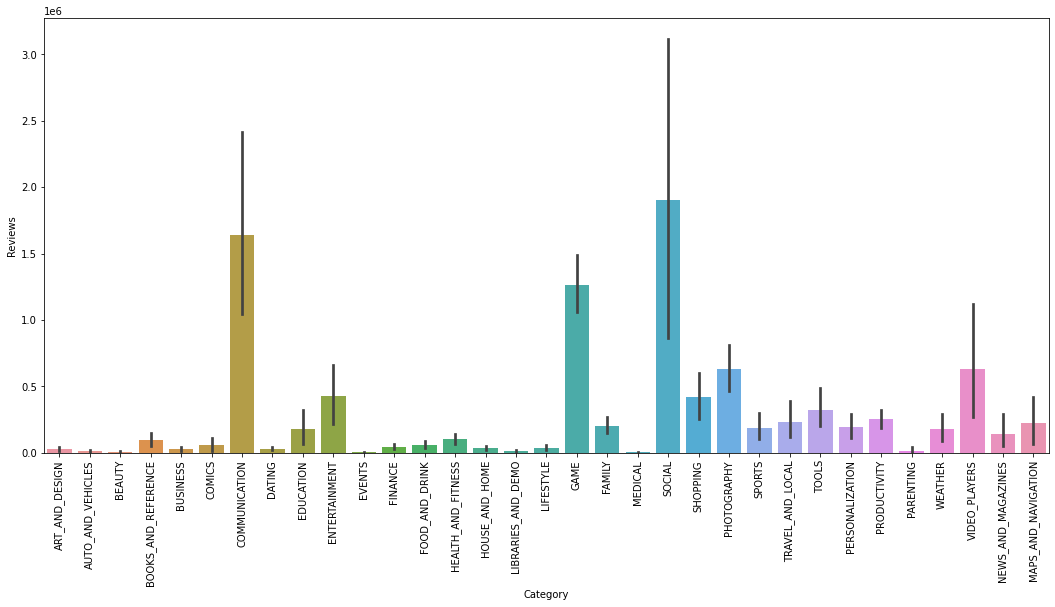

In [182]:
plt.subplots(figsize=(18,8))
plt.xticks(rotation=90)
sns.barplot('Category','Reviews',data=df)

# Social has many reviewed and popular apps and communication is the second most reviewed category

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Content Rating', ylabel='Installs'>

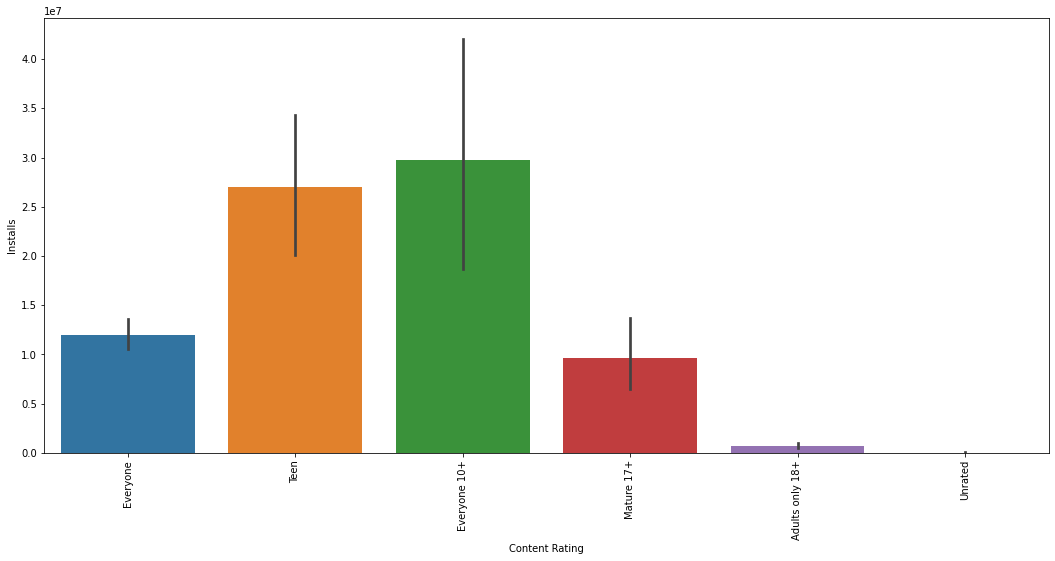

In [183]:
plt.subplots(figsize=(18,8))
plt.xticks(rotation=90)
sns.barplot('Content Rating','Installs',data=df)

# Everyone and Teen are most Installed 'Content Rating' column

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='Size'>

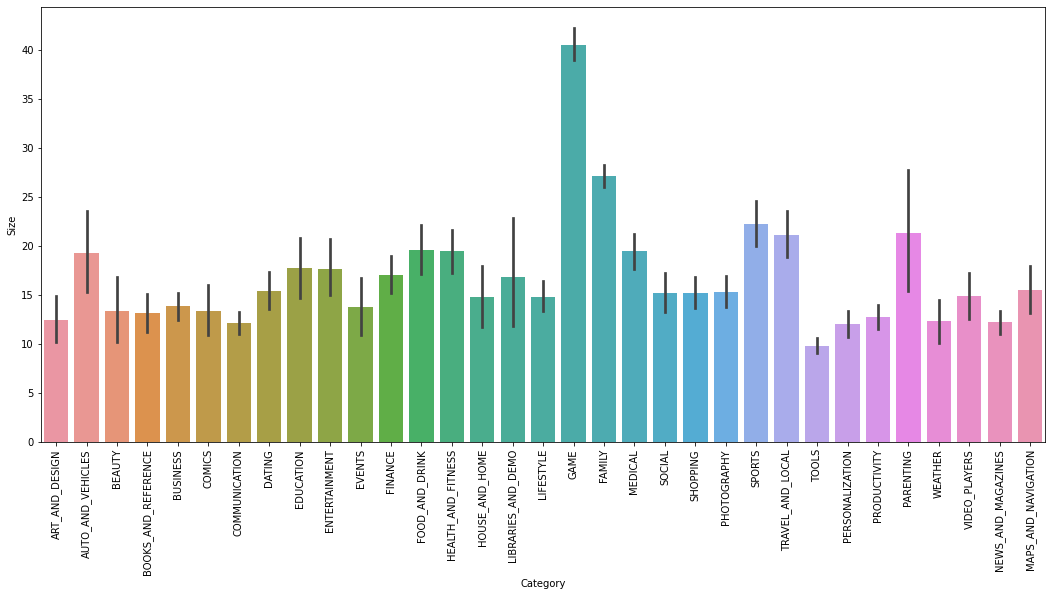

In [184]:
plt.subplots(figsize=(18,8))
plt.xticks(rotation=90)
sns.barplot('Category','Size',data=df)

# Game category has largest size apps.Family is second category which has large size apps

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='Rating'>

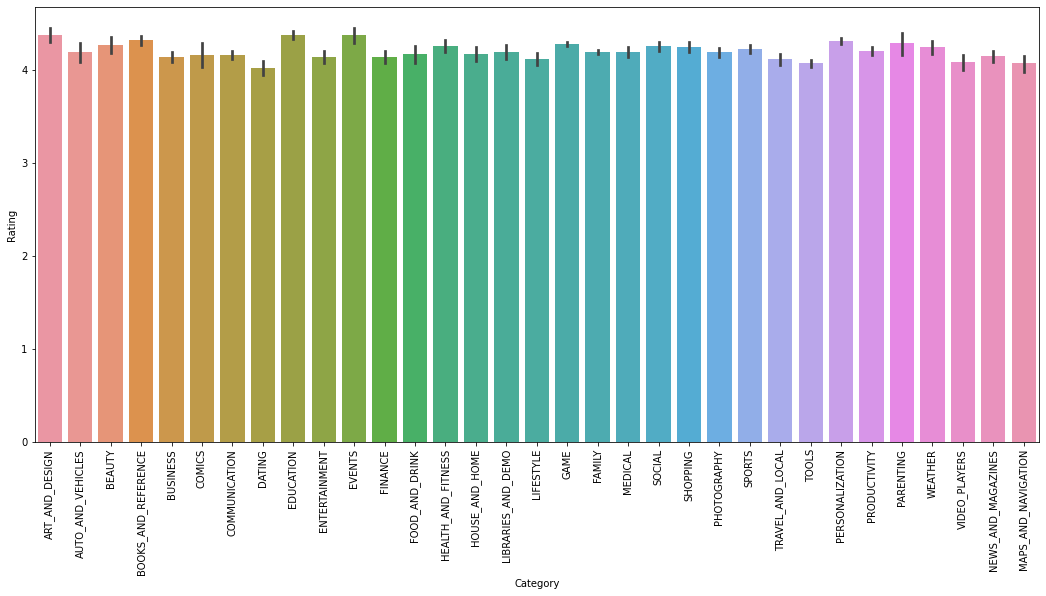

In [185]:
plt.subplots(figsize=(18,8))
plt.xticks(rotation=90)
sns.barplot('Category','Rating',data=df)

# Mostly all categories are rated equally not much difference i can see 

# Let's do some more analysis and take out some insights from the dataset 

# Family category is very popular in the playstore dataset 

<AxesSubplot:>

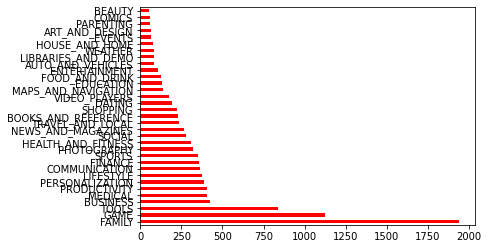

In [186]:
df['Category'].value_counts().plot(kind='barh',color='RED')

In [187]:
family=df[df['Category']=='FAMILY']

# Lets see most installed apps in family category 

In [188]:
family[['Installs','App','Category']].sort_values(by='Installs',ascending=False).head(21).reset_index(drop=True)

,Installs,App,Category
0,1000000000,Google Play Games,FAMILY
1,500000000,My Talking Tom,FAMILY
2,500000000,Candy Crush Saga,FAMILY
3,500000000,Pou,FAMILY
4,100000000,Farm Heroes Saga,FAMILY
5,100000000,My Talking Angela,FAMILY
6,100000000,Talking Tom Cat,FAMILY
7,100000000,Tom Loves Angela,FAMILY
8,100000000,Duolingo: Learn Languages Free,FAMILY
9,100000000,Clash Royale,FAMILY


# After "family", "game" is the most popular category

In [189]:
game=df[df['Category']=='GAME']

# Most Installed games in game category

In [190]:
game[['App','Installs','Category']].sort_values(by='Installs',ascending=False).drop_duplicates().head(20).reset_index(drop=True)

,App,Installs,Category
0,Subway Surfers,1000000000,GAME
1,Pou,500000000,GAME
2,Temple Run 2,500000000,GAME
3,My Talking Tom,500000000,GAME
4,Candy Crush Saga,500000000,GAME
5,Flow Free,100000000,GAME
6,Sniper 3D Gun Shooter: Free Shooting Games - FPS,100000000,GAME
7,Hill Climb Racing,100000000,GAME
8,Angry Birds Rio,100000000,GAME
9,Talking Tom Gold Run,100000000,GAME


# Most Installed Apps 

In [191]:
df[['App','Installs','Category']].sort_values(by='Installs',ascending=False).head(11).reset_index(drop=True).drop_duplicates()

,App,Installs,Category
0,WhatsApp Messenger,1000000000,COMMUNICATION
1,Google+,1000000000,SOCIAL
2,Google Street View,1000000000,TRAVEL_AND_LOCAL
3,Google News,1000000000,NEWS_AND_MAGAZINES
4,Maps - Navigate & Explore,1000000000,TRAVEL_AND_LOCAL
5,Instagram,1000000000,SOCIAL
6,Facebook,1000000000,SOCIAL
7,Google Play Games,1000000000,ENTERTAINMENT
8,Google,1000000000,TOOLS
10,Gmail,1000000000,COMMUNICATION


# Most reviewed Apps 

In [192]:
df[['App','Reviews','Category']].sort_values(by='Reviews',ascending=False).reset_index(drop=True).head(20).drop_duplicates('App').reset_index(drop=True)

,App,Reviews,Category
0,Facebook,78158306,SOCIAL
1,WhatsApp Messenger,69119316,COMMUNICATION
2,Instagram,66577446,SOCIAL
3,Messenger – Text and Video Chat for Free,56646578,COMMUNICATION
4,Clash of Clans,44893888,GAME
5,Clean Master- Space Cleaner & Antivirus,42916526,TOOLS
6,Subway Surfers,27725352,GAME
7,YouTube,25655305,VIDEO_PLAYERS


# Most Expensive and useless apps 

In [193]:
df[['App','Price']].sort_values(by='Price',ascending=False).reset_index(drop=True).head(10)

,App,Price
0,I'm Rich - Trump Edition,400.00
1,I am rich (Most expensive app),399.99
2,I Am Rich Premium,399.99
3,I am rich(premium),399.99
4,most expensive app (H),399.99
5,I am Rich Plus,399.99
6,I Am Rich Pro,399.99
7,I am rich,399.99
8,I am Rich,399.99
9,I AM RICH PRO PLUS,399.99


That's it for now

If you like my work, do cast an upvote, it helps!


In [194]:
df.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0.0,Everyone,Art & Design,26-Apr-18,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000,Free,0.0,Everyone,Art & Design,14-Jun-18,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0.0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0.0,Everyone,Art & Design;Creativity,3-Jul-18,2.8,4.0.3 and up


In [ ]:
df[['App','Genres']].sort_values(by='Genres',ascending=False).reset_index(drop=True).head(10)

In [197]:
df.groupby('Content Rating').mean('Installs').sort_values('Installs',ascending=False)


,Rating,Reviews,Size,Installs,Price
Content Rating,,,,,
Everyone 10+,4.251862,1.568738e+06,35.196533,2.976402e+07,0.390133
Teen,4.234642,8.719792e+05,27.438962,2.697930e+07,0.572670
Everyone,4.183839,2.942313e+05,18.383017,1.197182e+07,1.166203
Mature 17+,4.130425,3.387209e+05,22.893708,9.598874e+06,0.237383
Adults only 18+,4.300000,2.711600e+04,18.633333,6.666667e+05,0.000000
Unrated,4.150000,5.935000e+02,4.450000,2.525000e+04,0.000000


c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

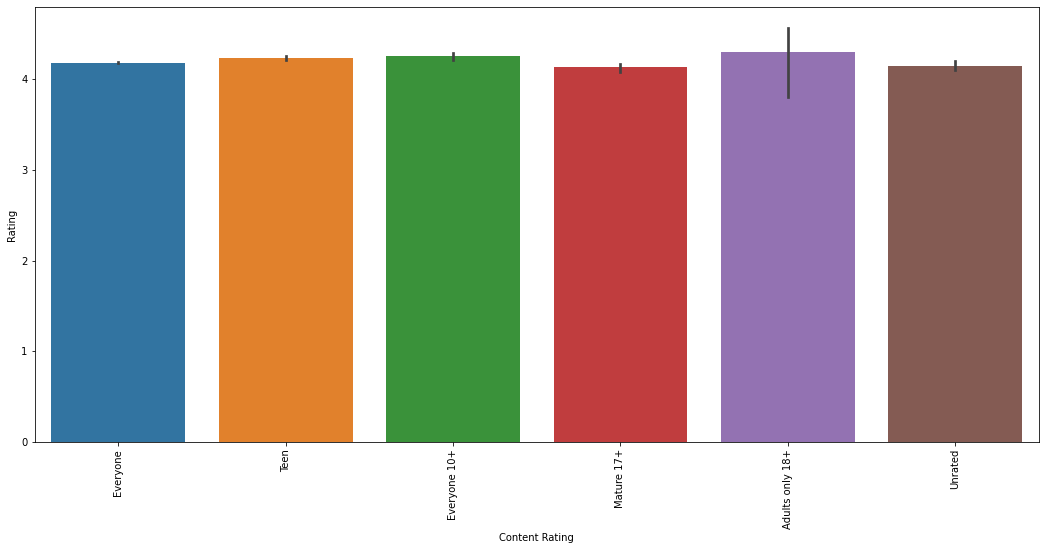

In [201]:
plt.subplots(figsize=(18,8))
plt.xticks(rotation=90)
sns.barplot('Content Rating','Rating',data=df)